## Transfer Learning Resnet 50 using Keras

Please download the dataset from the below url

In [1]:
import tensorflow as tf 

if tf.test.gpu_device_name(): 
    

    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))

else:

    print("Please install GPU version of TF")

Please install GPU version of TF


In [2]:
tf.test.gpu_device_name()

''

In [3]:
tf.__version__

'2.3.1'

In [4]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.applications.resnet import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob


In [5]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Dataset/train'
valid_path = 'Dataset/test'


In [6]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

#vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
resnet50= ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




In [7]:
resnet50.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [8]:
# don't train existing weights
for layer in resnet50.layers:
    layer.trainable = False

In [9]:
  # useful for getting number of output classes
folders = glob('Dataset/train/*')

In [10]:
folders


['Dataset/train/diseased cotton plant',
 'Dataset/train/diseased cotton leaf',
 'Dataset/train/fresh cotton leaf',
 'Dataset/train/fresh cotton plant']

In [11]:
# our layers - you can add more if you want
x = Flatten()(resnet50.output)

In [12]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet50.input, outputs=prediction)

In [13]:

# view the structure of the model
model.summary()


Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [14]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [15]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [16]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Dataset/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [17]:
test_set = test_datagen.flow_from_directory('Dataset/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 106 images belonging to 4 classes.


In [18]:
Valid_set = test_datagen.flow_from_directory('Dataset/val',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 253 images belonging to 4 classes.


In [ ]:
# Early stopping & checkpointing the best model in ../working dir & restoring that as our model for prediction
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint
EARLY_STOP_PATIENCE = 6
cb_early_stopper = EarlyStopping(monitor = 'val_loss', patience = EARLY_STOP_PATIENCE)
cb_checkpointer = ModelCheckpoint(filepath = '../working/best.hdf5', monitor = 'val_loss', save_best_only = True, mode = 'auto')

In [19]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=Valid_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
61/61 [==============================] - 236s 4s/step - loss: 2.9943 - accuracy: 0.3957 - val_loss: 1.0568 - val_accuracy: 0.5859
Epoch 2/10
61/61 [==============================] - 218s 4s/step - loss: 1.1709 - accuracy: 0.5669 - val_loss: 1.1058 - val_accuracy: 0.5859
Epoch 3/10
61/61 [==============================] - 246s 4s/step - loss: 1.2263 - accuracy: 0.5443 - val_loss: 0.9811 - val_accuracy: 0.6484
Epoch 4/10
61/61 [==============================] - 267s 4s/step - loss: 0.9001 - accuracy: 0.6279 - val_loss: 0.9987 - val_accuracy: 0.6172
Epoch 5/10
61/61 [==============================] - 272s 4s/step - loss: 0.9680 - accuracy: 0.6274 - val_loss: 0.7418 - val_accuracy: 0.7109
Epoch 6/10
61/61 [==============================] - 285s 5s/step - loss: 0.9253 - accuracy: 0.6530 - val_loss: 0.7194 - val_accuracy: 0.7344
Epoch 7/10
61/61 [==============================] - 270s 4s/step - loss: 0.807

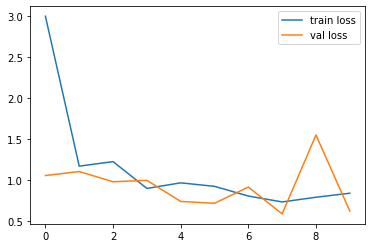

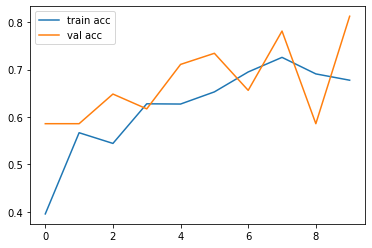

<Figure size 432x288 with 0 Axes>

In [36]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [37]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_Resnet50.h5')

In [38]:

y_pred = model.predict(test_set)


In [39]:
y_pred

array([[3.21441155e-04, 2.69011184e-06, 9.99637604e-01, 3.82858125e-05],
       [1.34770013e-02, 5.58065735e-02, 5.07039130e-01, 4.23677355e-01],
       [1.18137999e-02, 5.52605510e-01, 9.17331874e-02, 3.43847454e-01],
       [4.49881610e-03, 5.92815638e-01, 5.65300754e-04, 4.02120322e-01],
       [4.91229678e-03, 1.62620097e-02, 9.71265793e-01, 7.55989784e-03],
       [9.41799302e-03, 9.04844999e-01, 4.78696497e-03, 8.09500068e-02],
       [6.12711255e-03, 2.62118075e-02, 9.45118368e-01, 2.25426983e-02],
       [1.53932059e-02, 1.46256298e-01, 5.69376528e-01, 2.68973917e-01],
       [4.59525269e-03, 3.67171888e-04, 9.85701680e-01, 9.33584385e-03],
       [1.95535403e-02, 4.89452899e-01, 1.74947068e-01, 3.16046506e-01],
       [3.71547416e-02, 1.73931912e-01, 1.52911693e-01, 6.36001706e-01],
       [2.49202573e-03, 9.70895827e-01, 5.88388502e-05, 2.65533589e-02],
       [6.59376308e-02, 6.31506205e-01, 2.02049781e-02, 2.82351106e-01],
       [1.95332360e-03, 6.41287327e-01, 7.41780316e

In [40]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [41]:
y_pred

array([2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 3, 1, 1, 1, 1, 0, 0, 1, 1, 3, 1, 1,
       1, 1, 3, 2, 1, 1, 3, 3, 2, 1, 1, 1, 1, 3, 2, 0, 2, 1, 3, 1, 3, 3,
       1, 1, 2, 1, 1, 3, 1, 1, 2, 0, 1, 1, 1, 0, 1, 1, 2, 2, 1, 1, 1, 0,
       3, 0, 3, 2, 1, 3, 2, 1, 1, 1, 1, 0, 2, 1, 0, 2, 3, 1, 1, 2, 3, 0,
       0, 3, 0, 1, 2, 3, 2, 2, 1, 1, 3, 2, 1, 0, 1, 0, 3, 2])

In [42]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [43]:
model=load_model('model_Resnet50.h5')

In [44]:
img=image.load_img('diseasedLeaf.jpg',target_size=(224,224))



In [45]:
x=image.img_to_array(img)
x

array([[[140., 197., 128.],
        [131., 188., 119.],
        [130., 187., 118.],
        ...,
        [ 57., 127.,  39.],
        [ 55., 125.,  37.],
        [ 58., 128.,  40.]],

       [[142., 199., 130.],
        [134., 191., 122.],
        [132., 189., 120.],
        ...,
        [ 57., 127.,  39.],
        [ 58., 128.,  40.],
        [ 64., 134.,  46.]],

       [[143., 200., 131.],
        [135., 192., 123.],
        [134., 191., 122.],
        ...,
        [ 61., 131.,  43.],
        [ 59., 129.,  41.],
        [ 61., 131.,  43.]],

       ...,

       [[195., 180., 139.],
        [142., 127.,  88.],
        [140., 124.,  88.],
        ...,
        [ 88.,  80.,  57.],
        [106.,  98.,  75.],
        [116., 108.,  85.]],

       [[182., 167., 128.],
        [158., 142., 106.],
        [118., 102.,  68.],
        ...,
        [ 90.,  82.,  59.],
        [106.,  98.,  75.],
        [ 98.,  90.,  67.]],

       [[183., 167., 133.],
        [138., 122.,  89.],
        [137., 1

In [46]:
x.shape

(224, 224, 3)

In [47]:
x=x/255

In [48]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [49]:
model.predict(img_data)

array([[5.1497370e-01, 3.4340749e-14, 4.8502633e-01, 1.4760739e-13]],
      dtype=float32)

In [50]:
a=np.argmax(model.predict(img_data), axis=1)

In [51]:
a

array([0])